In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#importing dataset
df = pd.read_csv("weight-height (1).csv")

In [3]:
# seeing 1st 5 row using head() function
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#shape of dataset
df.shape

(8555, 3)

In [5]:
# seeing info of a dataset using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [6]:
# seeing count, mean, std etc using describe function
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [7]:
#seeing duplicated values
df.duplicated().sum()

np.int64(0)

In [8]:
#seeing NAN value using isna() 
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
# changing column name
df = df.rename(columns={'Gender':'gender','Height':'height','Weight':'weight'})

In [10]:
# seeing column name
df.columns

Index(['gender', 'height', 'weight'], dtype='object')

In [11]:
#checking gender value
df['gender'].value_counts()

gender
Male      5000
Female    3555
Name: count, dtype: int64

Visualisation

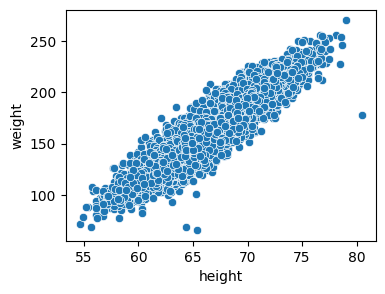

In [12]:
#relation between Height and Weight
plt.figure(figsize=(4,3))
sns.scatterplot(x='height',y='weight', data=df)
plt.show()

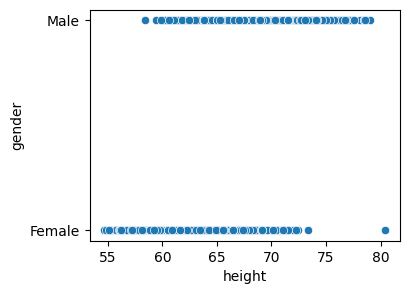

In [13]:
#relation between Height and Gender
plt.figure(figsize=(4,3))
sns.scatterplot(x='height',y='gender', data=df)
plt.show()

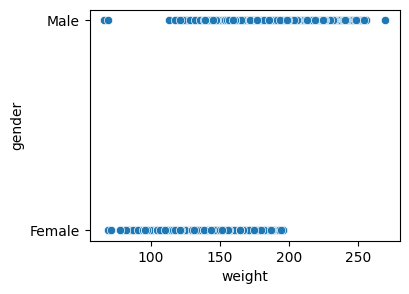

In [14]:
#relation between Weight and Gender
plt.figure(figsize=(4,3))
sns.scatterplot(x='weight',y='gender', data=df)
plt.show()

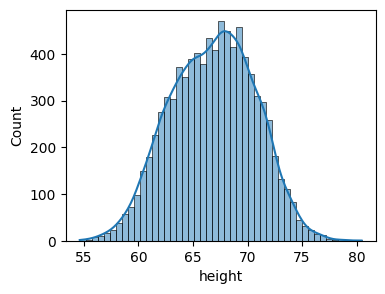

In [15]:
plt.figure(figsize=(4,3))
sns.histplot(df['height'], kde=True)
plt.show()

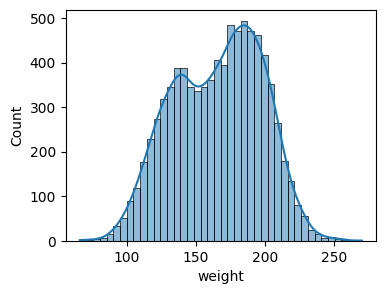

In [16]:
plt.figure(figsize=(4,3))
sns.histplot(df['weight'], kde=True)
plt.show()

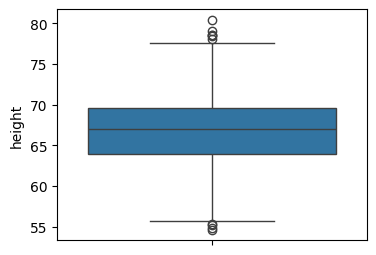

In [17]:
#checking outlier of height using 
plt.figure(figsize=(4,3))
sns.boxplot(df['height'])
plt.show()

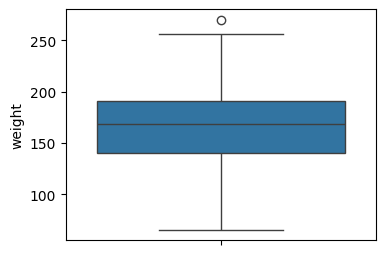

In [18]:
#checking outlier of weight using 
plt.figure(figsize=(4,3))
sns.boxplot(df['weight'])
plt.show()

In [20]:
# removing outlier using boxplot
def outlier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    iqr = q3 - q1

    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr

    df[col] = np.clip(df[col], upper_whisker, lower_whisker)
    return df

In [23]:
#column selecting for removing outlier 
sel_col = df[['height', 'weight']]

In [25]:
df_clean = df.copy()

In [26]:
for col2 in sel_col.columns:
    df_clean = outlier(df_clean, col2)

In [27]:
df = df_clean.copy()

height


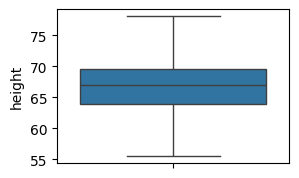

weight


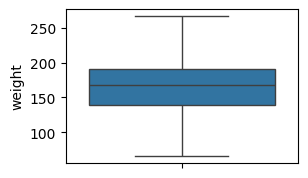

In [29]:
#checking outlier
for col3 in sel_col:
    print(col3)
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col3])
    plt.show()

In [30]:
df.shape

(8555, 3)

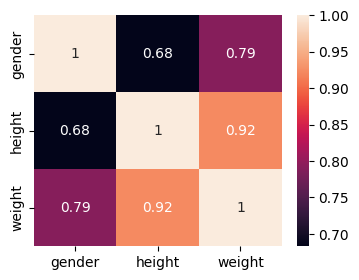

In [48]:
#correlation
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
#encoding
le = LabelEncoder()

In [35]:
df['gender'] = le.fit_transform(df['gender'])

In [36]:
df.head()

,gender,height,weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [38]:
#feature / target split
x = df[['height', 'weight']]
y = df[['gender']]

In [39]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
xtrain.head()

,height,weight
6826,60.817590,133.879483
624,71.711125,199.080779
5518,63.674482,134.660232
3946,70.466623,187.283252
6993,61.528212,117.654738


In [41]:
ytrain.head()

,gender
6826,0
624,1
5518,0
3946,1
6993,0


# applying KNN classification


In [43]:
#model implementation
knnc = KNeighborsClassifier()

In [44]:
knnc_model = knnc.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#traiin score check
knnc_model.score(xtrain, ytrain)

0.9282583284628872

In [ ]:
#test score check
knnc_model.score(xtrain, ytrain)

0.9282583284628872

In [49]:
#prediction
knnc_pred_y = knnc_model.predict(xtest)

In [53]:
#confussion metrics
cm_k = confusion_matrix(ytest, knnc_pred_y)
cm_k

array([[630,  76],
       [ 64, 941]])

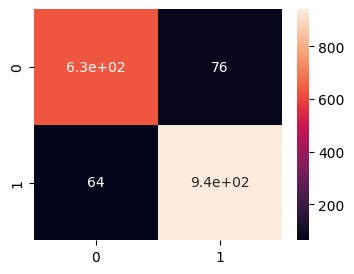

In [54]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_k, annot=True)
plt.show()

In [56]:
#Classification report
cl_k = classification_report(ytest, knnc_pred_y)
print(cl_k)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       706
           1       0.93      0.94      0.93      1005

    accuracy                           0.92      1711
   macro avg       0.92      0.91      0.92      1711
weighted avg       0.92      0.92      0.92      1711



In [ ]:
#accuracy score 
